# Configuração do ambiente

In [ ]:
# instalar o java
# o uso de '!' permite usar a cedula como o terminal
!apt.get install openjdk-17-jdk-headless -qq > /dev/null


/bin/bash: line 1: apt.get: command not found


In [ ]:
!java --version

openjdk 11.0.22 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [ ]:
# Apache spark
# 'wget' para baixar
!wget -q  https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

In [ ]:
# descompactar o arquivo do Apache
! tar -xf spark-3.5.1-bin-hadoop3.tgz

In [ ]:
# deletar o Apache "zipado"
!rm -rf spark-3.5.1-bin-hadoop3.tgz

In [ ]:
# para configurar as variáveis de ambiente se precisa do pacote "os"
import os

In [ ]:
# Configurar as variáveis de ambiente
import os
os.environ['JAVA_HOME'] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ['SPARK_HOME'] = "/content/spark-3.5.1-bin-hadoop3"

In [ ]:
# instalar 'findspark' para o colab reconhecer o spark
!pip install -q findspark

In [ ]:
# Inicializar o Spark e criar sessão

# importando o findspark
import findspark
findspark.init() # procurar pelas variáveis "JAVA_HOME" E "SPARK_HOME" e informa ao
# sistema operacional onde encontrar o apache spark

# CRIANDO UMA SESSÃO SPARK
from pyspark.sql import SparkSession

# Criando uma sessão, cluster de uma máquina só, dando nome, criar nova sessão se não existir
spark = SparkSession.builder.master("local[*]").appName('Exercicio').getOrCreate()

In [ ]:
# testando spark

marvel_movies_df = spark.read.csv("/content/Marvel_Movies.csv", header=True)

marvel_movies_df.show()

+--------------------+---------------+----+--------------------+------------------+---------------+----------------+------------------------------+------+-------------------+------------------------+--------------------+-------------------+---------------------------+----------------------------+---------------------+--------------------------+------------------------+
|               movie|       category|year|worldwide gross ($m)|% budget recovered|critics % score|audience % score|audience vs critics % deviance|budget|domestic gross ($m)|international gross ($m)|opening weekend ($m)|second weekend ($m)|1st vs 2nd weekend drop off|% gross from opening weekend|% gross from domestic|% gross from international|% budget opening weekend|
+--------------------+---------------+----+--------------------+------------------+---------------+----------------+------------------------------+------+-------------------+------------------------+--------------------+-------------------+----------------

# Capturando dados e agrupando

In [ ]:
marvel_movies_df = spark.read.csv("/content/Marvel_Movies.csv", header=True)

from pyspark.sql import functions as F

# receita mundial
receita_mundial = marvel_movies_df.select(F.sum('worldwide gross ($m)').alias("Receita mundial"))
media_receita_mundial = marvel_movies_df.select(F.mean('worldwide gross ($m)').alias("Média da receita mundial"))

# receita domestica
receita_domestica = marvel_movies_df.select(F.sum('domestic gross ($m)').alias("Receita doméstica"))
media_receita_domestica = marvel_movies_df.select(F.mean('domestic gross ($m)').alias("Média da receita doméstica"))

# receita internacional
receita_internacional = marvel_movies_df.select(F.sum('international gross ($m)').alias("Receita internacional"))
media_receita_internacional = marvel_movies_df.select(F.mean('international gross ($m)').alias("Média da receita internacional"))

# Exibindo os resultados
receita_mundial.show()
media_receita_mundial.show()
receita_domestica.show()
media_receita_domestica.show()
receita_internacional.show()
media_receita_internacional.show()

# Instruções
# Calculando a média de uma coluna
# average_runtime = marvel_movies_df.select(F.avg('worldwide gross ($m)').alias("average_runtime"))

# Calculando o máximo de uma coluna
# max_budget = marvel_movies_df.select(F.max("budget").alias("max_budget"))

# Calculando o mínimo de uma coluna
# min_revenue = marvel_movies_df.select(F.min("revenue").alias("min_revenue"))

# Calculando a soma de uma coluna
# total_profit = marvel_movies_df.select(F.sum("profit").alias("total_profit"))

# Calculando o número de linhas do DataFrame
# total_movies = marvel_movies_df.count()

+---------------+
|Receita mundial|
+---------------+
|        32299.0|
+---------------+

+------------------------+
|Média da receita mundial|
+------------------------+
|       897.1944444444445|
+------------------------+

+-----------------+
|Receita doméstica|
+-----------------+
|          12980.0|
+-----------------+

+--------------------------+
|Média da receita doméstica|
+--------------------------+
|        360.55555555555554|
+--------------------------+

+---------------------+
|Receita internacional|
+---------------------+
|              19303.0|
+---------------------+

+------------------------------+
|Média da receita internacional|
+------------------------------+
|             536.1944444444445|
+------------------------------+



# Receitas exibição básica

In [ ]:
import pandas as pd

# Carregar o arquivo CSV
file_path = "/content/Marvel_Movies.csv"
marvel_movies_df = pd.read_csv(file_path)

# Renomear colunas para português
marvel_movies_df.columns = [
    'filme', 'categoria', 'ano', 'receita_mundial_milhoes', 'percentual_orcamento_recuperado',
    'percentual_criticos', 'percentual_publico', 'desvio_percentual_publico_criticos',
    'orcamento_milhoes', 'receita_domestica_milhoes', 'receita_internacional_milhoes', 'estreia_milhoes',
    'segunda_semana_milhoes', 'queda_primeira_segunda_semana', 'percentual_receita_estreia',
    'percentual_receita_domestica', 'percentual_receita_internacional', 'percentual_orcamento_estreia'
]

# Calcular as métricas
receita_mundial_total = marvel_movies_df['receita_mundial_milhoes'].sum()
receita_mundial_media = marvel_movies_df['receita_mundial_milhoes'].mean()

receita_domestica_total = marvel_movies_df['receita_domestica_milhoes'].sum()
receita_domestica_media = marvel_movies_df['receita_domestica_milhoes'].mean()

receita_internacional_total = marvel_movies_df['receita_internacional_milhoes'].sum()
receita_internacional_media = marvel_movies_df['receita_internacional_milhoes'].mean()

# Exibir os resultados
print(f"Receita Mundial Total: ${receita_mundial_total} milhões")
print(f"Receita Mundial Média por Filme: ${receita_mundial_media:.2f} milhões")
print(f"Receita Doméstica Total: ${receita_domestica_total} milhões")
print(f"Receita Doméstica Média por Filme: ${receita_domestica_media:.2f} milhões")
print(f"Receita Internacional Total: ${receita_internacional_total} milhões")
print(f"Receita Internacional Média por Filme: ${receita_internacional_media:.2f} milhões")


Receita Mundial Total: $32299 milhões
Receita Mundial Média por Filme: $897.19 milhões
Receita Doméstica Total: $12980 milhões
Receita Doméstica Média por Filme: $360.56 milhões
Receita Internacional Total: $19303 milhões
Receita Internacional Média por Filme: $536.19 milhões


# Receitas exibição básica (gráficos)

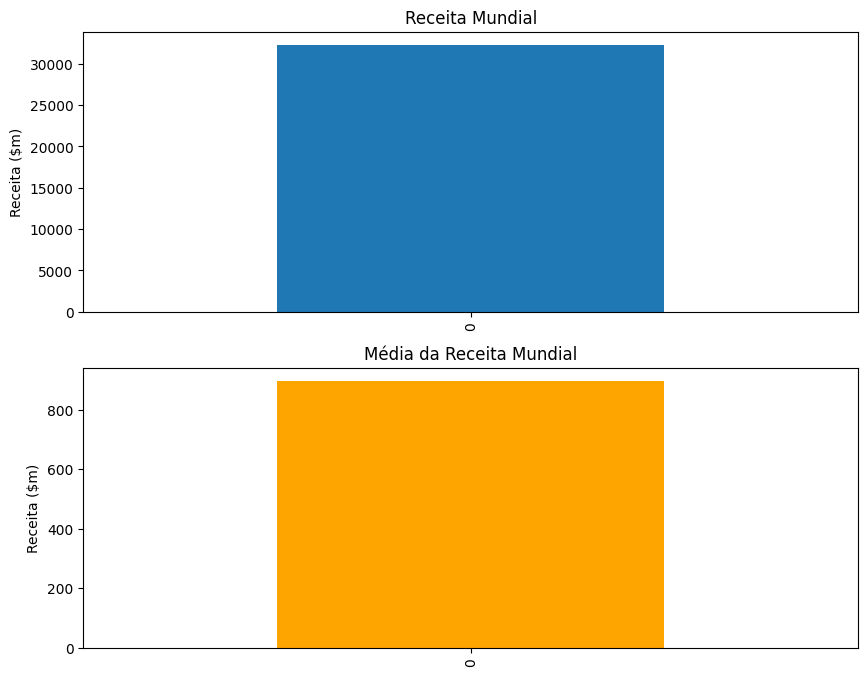

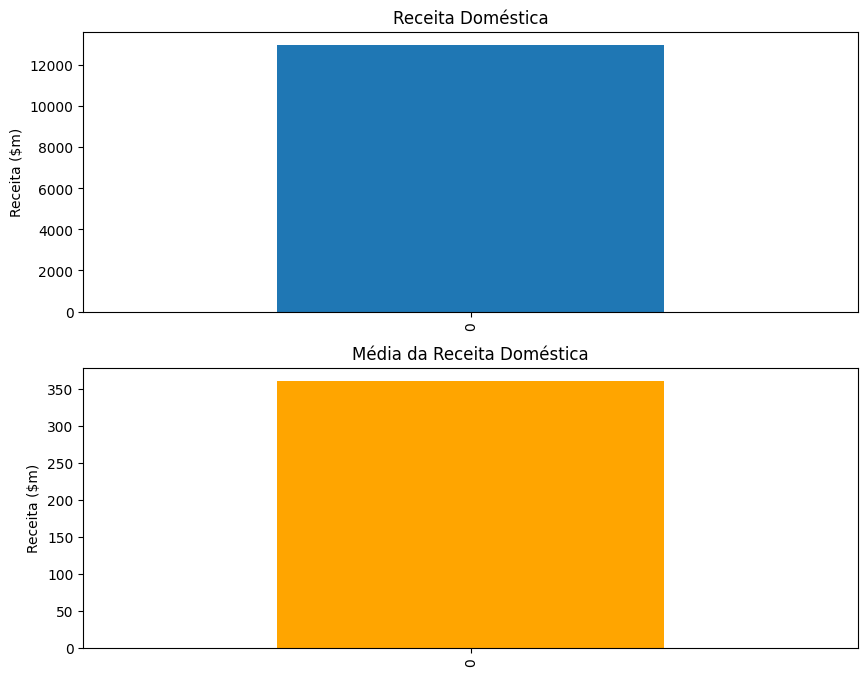

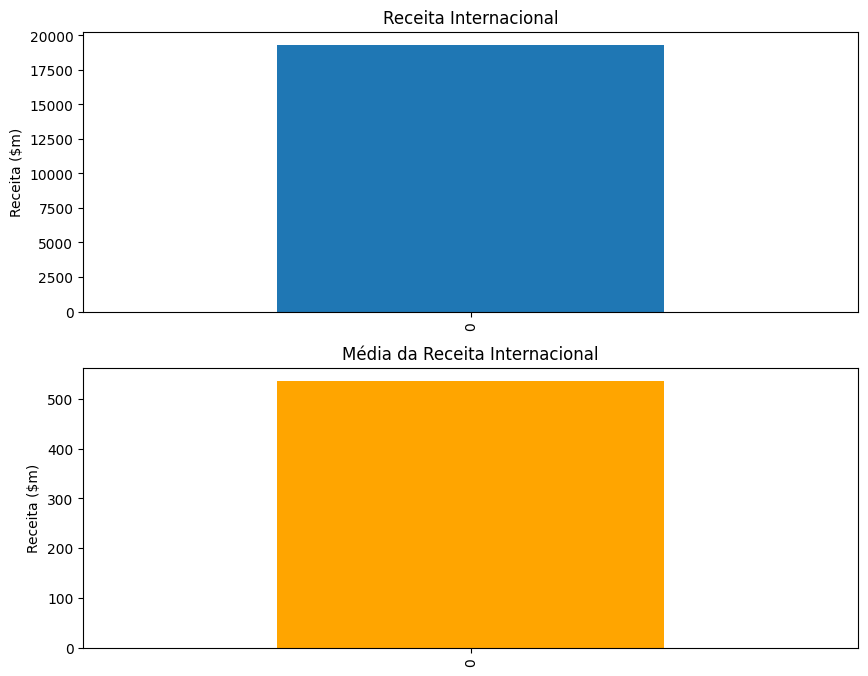

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo os resultados para Pandas DataFrame
df_receita_mundial = receita_mundial.toPandas()
df_media_receita_mundial = media_receita_mundial.toPandas()
df_receita_domestica = receita_domestica.toPandas()
df_media_receita_domestica = media_receita_domestica.toPandas()
df_receita_internacional = receita_internacional.toPandas()
df_media_receita_internacional = media_receita_internacional.toPandas()

# Gráfico de barras para a receita mundial e média da receita mundial
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

df_receita_mundial.plot(kind='bar', ax=axs[0], legend=None)
axs[0].set_title('Receita Mundial')
axs[0].set_ylabel('Receita ($m)')
df_media_receita_mundial.plot(kind='bar', ax=axs[1], legend=None, color='orange')
axs[1].set_title('Média da Receita Mundial')
axs[1].set_ylabel('Receita ($m)')

# Gráfico de barras para a receita doméstica e média da receita doméstica
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

df_receita_domestica.plot(kind='bar', ax=axs[0], legend=None)
axs[0].set_title('Receita Doméstica')
axs[0].set_ylabel('Receita ($m)')
df_media_receita_domestica.plot(kind='bar', ax=axs[1], legend=None, color='orange')
axs[1].set_title('Média da Receita Doméstica')
axs[1].set_ylabel('Receita ($m)')

# Gráfico de barras para a receita internacional e média da receita internacional
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

df_receita_internacional.plot(kind='bar', ax=axs[0], legend=None)
axs[0].set_title('Receita Internacional')
axs[0].set_ylabel('Receita ($m)')
df_media_receita_internacional.plot(kind='bar', ax=axs[1], legend=None, color='orange')
axs[1].set_title('Média da Receita Internacional')
axs[1].set_ylabel('Receita ($m)')

plt.show()


# Receita mundial, doméstica e internacional por ano

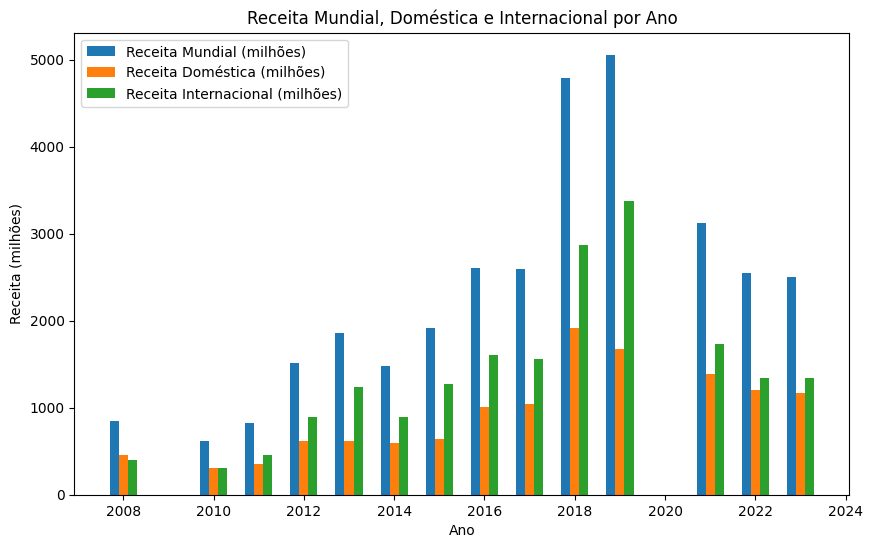

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = "/content/Marvel_Movies.csv"
marvel_movies_df = pd.read_csv(file_path)

# Renomear colunas para português do Brasil
marvel_movies_df.columns = [
    'filme', 'categoria', 'ano', 'receita_mundial_milhoes', 'percentual_orcamento_recuperado',
    'percentual_criticos', 'percentual_publico', 'desvio_percentual_publico_criticos',
    'orcamento_milhoes', 'receita_domestica_milhoes', 'receita_internacional_milhoes', 'estreia_milhoes',
    'segunda_semana_milhoes', 'queda_primeira_segunda_semana', 'percentual_receita_estreia',
    'percentual_receita_domestica', 'percentual_receita_internacional', 'percentual_orcamento_estreia'
]

# Criar um DataFrame agrupado por ano e somando as receitas
receitas_ano = marvel_movies_df.groupby('ano')[['receita_mundial_milhoes', 'receita_domestica_milhoes', 'receita_internacional_milhoes']].sum().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(receitas_ano['ano'] - 0.2, receitas_ano['receita_mundial_milhoes'], width=0.2, label='Receita Mundial (milhões)')
plt.bar(receitas_ano['ano'], receitas_ano['receita_domestica_milhoes'], width=0.2, label='Receita Doméstica (milhões)')
plt.bar(receitas_ano['ano'] + 0.2, receitas_ano['receita_internacional_milhoes'], width=0.2, label='Receita Internacional (milhões)')
plt.xlabel('Ano')
plt.ylabel('Receita (milhões)')
plt.title('Receita Mundial, Doméstica e Internacional por Ano')
plt.legend()
plt.show()


# Pontuação dos críticos e do público por filme

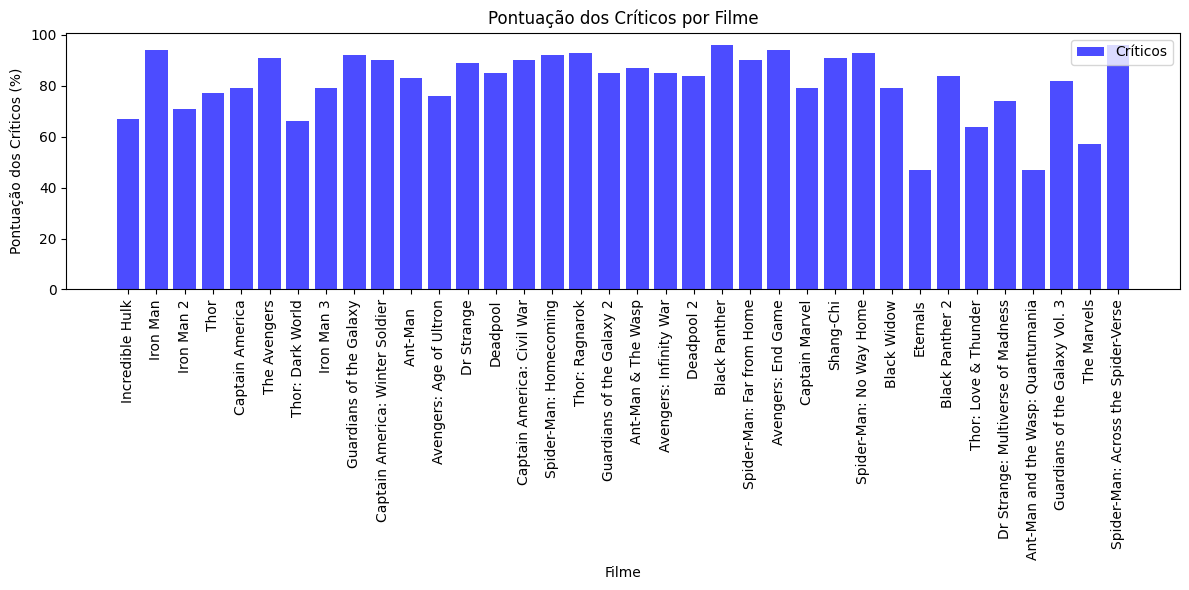

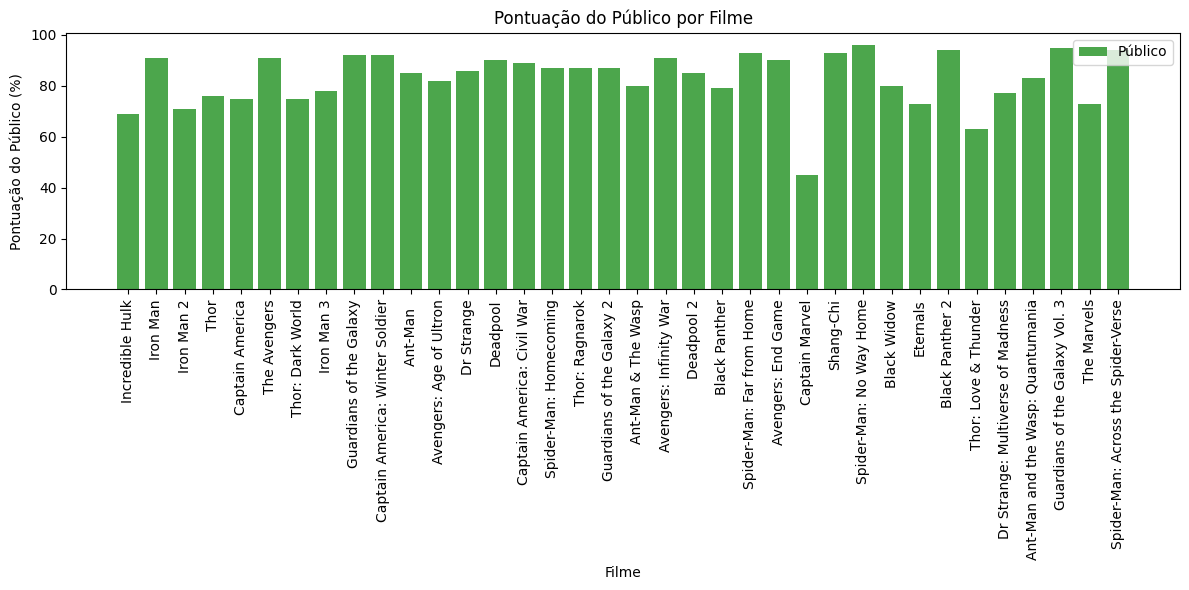

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path =  "/content/Marvel_Movies.csv"
marvel_movies_df = pd.read_csv(file_path)

# Renomear colunas para português do Brasil
marvel_movies_df.columns = [
    'filme', 'categoria', 'ano', 'receita_mundial_milhoes', 'percentual_orcamento_recuperado',
    'percentual_criticos', 'percentual_publico', 'desvio_percentual_publico_criticos',
    'orcamento_milhoes', 'receita_domestica_milhoes', 'receita_internacional_milhoes', 'estreia_milhoes',
    'segunda_semana_milhoes', 'queda_primeira_segunda_semana', 'percentual_receita_estreia',
    'percentual_receita_domestica', 'percentual_receita_internacional', 'percentual_orcamento_estreia'
]

# Remover o símbolo de porcentagem e converter para números
marvel_movies_df['percentual_criticos'] = marvel_movies_df['percentual_criticos'].str.rstrip('%').astype(float)
marvel_movies_df['percentual_publico'] = marvel_movies_df['percentual_publico'].str.rstrip('%').astype(float)

# Ordenar os filmes pelo ano
marvel_movies_df = marvel_movies_df.sort_values(by='ano')

# Plotar gráfico de barras para a pontuação dos críticos
plt.figure(figsize=(12, 6))
plt.bar(marvel_movies_df['filme'], marvel_movies_df['percentual_criticos'], color='blue', alpha=0.7, label='Críticos')
plt.xlabel('Filme')
plt.ylabel('Pontuação dos Críticos (%)')
plt.title('Pontuação dos Críticos por Filme')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar gráfico de barras para a pontuação do público
plt.figure(figsize=(12, 6))
plt.bar(marvel_movies_df['filme'], marvel_movies_df['percentual_publico'], color='green', alpha=0.7, label='Público')
plt.xlabel('Filme')
plt.ylabel('Pontuação do Público (%)')
plt.title('Pontuação do Público por Filme')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# Percentual do Orçamento Recuperado

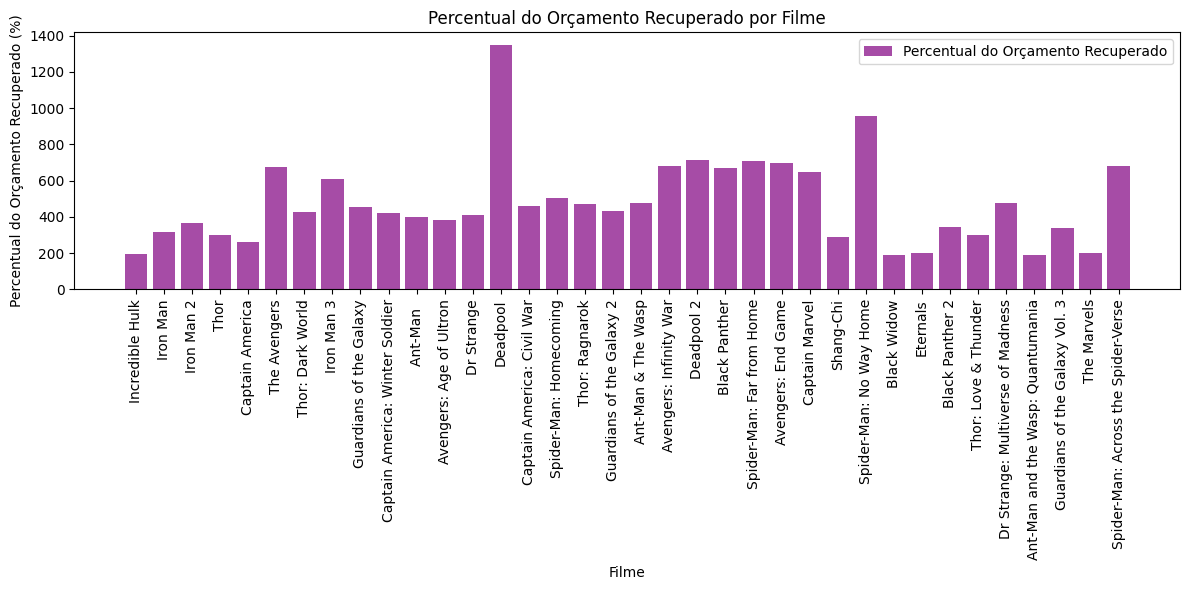

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = "/content/Marvel_Movies.csv"
marvel_movies_df = pd.read_csv(file_path)

# Renomear colunas para português do Brasil
marvel_movies_df.columns = [
    'filme', 'categoria', 'ano', 'receita_mundial_milhoes', 'percentual_orcamento_recuperado',
    'percentual_criticos', 'percentual_publico', 'desvio_percentual_publico_criticos',
    'orcamento_milhoes', 'receita_domestica_milhoes', 'receita_internacional_milhoes', 'estreia_milhoes',
    'segunda_semana_milhoes', 'queda_primeira_segunda_semana', 'percentual_receita_estreia',
    'percentual_receita_domestica', 'percentual_receita_internacional', 'percentual_orcamento_estreia'
]

# Remover o símbolo de porcentagem e converter para números na coluna de percentual de orçamento recuperado
marvel_movies_df['percentual_orcamento_recuperado'] = marvel_movies_df['percentual_orcamento_recuperado'].str.rstrip('%').astype(float)

# Ordenar os filmes pelo ano
marvel_movies_df = marvel_movies_df.sort_values(by='ano')

# Plotar gráfico de barras para o percentual de orçamento recuperado
plt.figure(figsize=(12, 6))
plt.bar(marvel_movies_df['filme'], marvel_movies_df['percentual_orcamento_recuperado'], color='purple', alpha=0.7, label='Percentual do Orçamento Recuperado')
plt.xlabel('Filme')
plt.ylabel('Percentual do Orçamento Recuperado (%)')
plt.title('Percentual do Orçamento Recuperado por Filme')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
